In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

file_path = '../Données/TDP.xlsx'
df = pd.read_excel(file_path)


objet = ["Ecole",'Age','Habitat','id_parcelle',"code echantillon", 'Species', 'Moy E1_E2']

targets = ['Species', 'Moy E1_E2']

features = [col for col in df.columns if col not in objet]

df.fillna(0, inplace=True)


X = df[features]
y = df[targets]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

print("Prédictions:", y_pred[:5])
print("Valeurs réelles:", y_test[:5].values)


Erreur quadratique moyenne: 149.46310492124243
Prédictions: [[ 1.05       19.49833159]
 [ 1.78       18.14610931]
 [ 2.67       33.02463506]
 [ 2.82       51.30629185]
 [ 1.82       40.21472635]]
Valeurs réelles: [[ 2.         25.60628467]
 [ 1.         18.44006955]
 [ 0.         37.39716529]
 [ 7.         67.53186519]
 [ 3.         46.0583525 ]]


         Feature  Importance
23         N_Tot    0.489914
22            MO    0.119241
27            Zn    0.098054
26            Pb    0.057017
18       Surface    0.047264
24            Cu    0.032176
3        Occ_Ugs    0.020841
17  Enfantsparm2    0.013577
5        Occ_Tud    0.012137
11         P_Tud    0.011782
20         Limon    0.011598
25            Ni    0.010419
16   Emplacement    0.008540
21         Sable    0.007462
19        Argile    0.006859
9          P_Ugs    0.006529
13           SHI    0.006222
0      Nb arbres    0.006185
2         Occ_Ag    0.005618
4         Occ_eq    0.004994
10          P_eq    0.004987
7          P_Nat    0.004579
1        Occ_Nat    0.003251
6        Occ_Tuc    0.002799
14         Temps    0.002530
8           P_Ag    0.002150
12         P_Tuc    0.001937
15    Ganivelles    0.001337


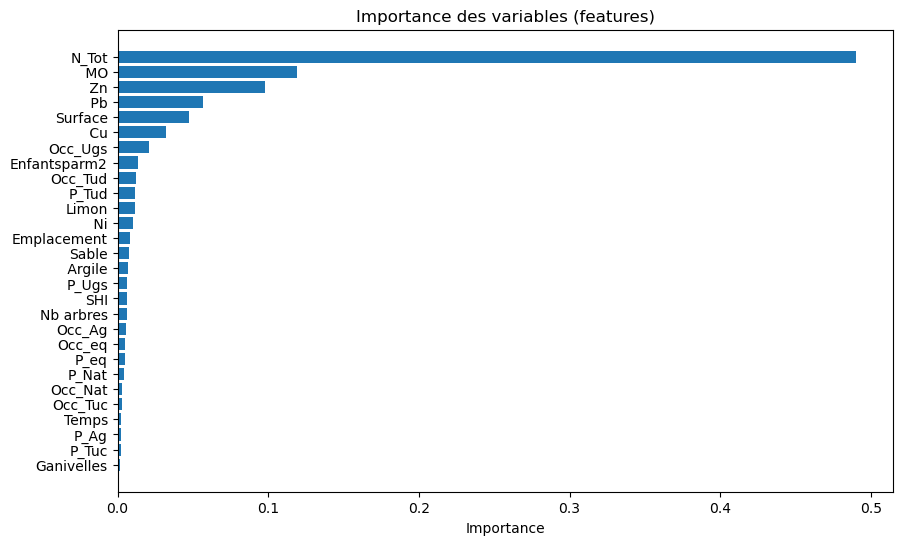

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Importance des variables (features)')
plt.gca().invert_yaxis() 
plt.show()


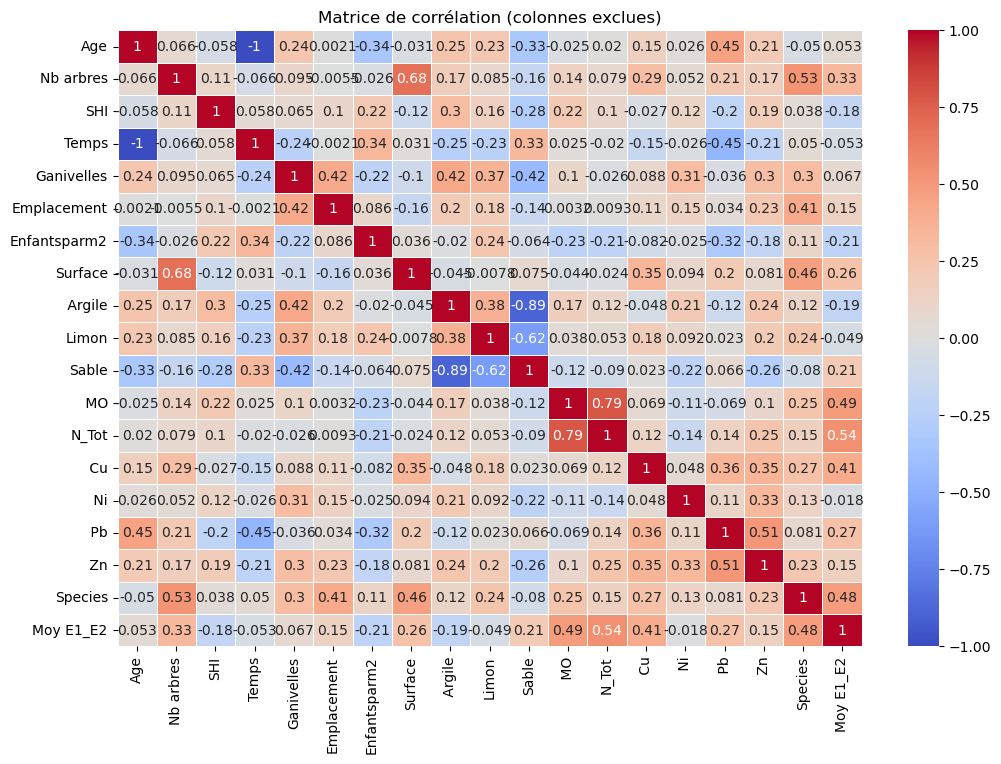

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('../Données/TDP.xlsx')

cols_to_exclude = ['Occ_Nat', 'Occ_Ag', 'Occ_Ugs', 'Occ_eq', 'Occ_Tud', 'Occ_Tuc',
                   'P_Nat', 'P_Ag', 'P_Ugs', 'P_eq', 'P_Tud', 'P_Tuc']


df_filtered = df.drop(columns=cols_to_exclude).select_dtypes(include=['float64', 'int64'])


corr_matrix = df_filtered.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation (colonnes exclues)')
plt.show()
